In [130]:
# Initial imports
import numpy as np
import pandas as pd
from stockstats import StockDataFrame as sdf
import requests
from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
from pathlib import Path
import lib_copy
%matplotlib inline

In [131]:
load_dotenv()

Python-dotenv could not parse statement starting at line 7
Python-dotenv could not parse statement starting at line 8


True

In [132]:


df = lib_copy.fetch_ohlcv("JPM", "2017-01-01", "2019-01-01")


In [133]:
def adding_boll_kelt_ewma_dataframe(dataframe):
    lib_copy.bollinger_band_generator(dataframe)
    lib_copy.keltner_channel(dataframe)
    lib_copy.ewma(dataframe)

    return dataframe

In [134]:
everything = adding_boll_kelt_ewma_dataframe(df)

In [135]:
# Looking for missing values
everything.isnull().sum().sum()

61

In [136]:
# Filling missing values with the previous ones
everything = df.dropna()
everything

,open,high,low,close,volume,bollinger_band_middle,bollinger_band_std,bollinger_band_upper,bollinger_band_lower,close_-1_s,tr,tr_14_smma,atr,kcmid,kcup,kclo,EMA9,EMA21
2017-01-04 12:15:00-05:00,86.74,86.820,86.730,86.80,18457,86.66975,0.215116,87.099982,86.239518,86.75,0.090,0.203311,0.203311,86.66975,86.873061,86.466439,86.713479,86.661031
2017-01-04 12:30:00-05:00,86.81,86.875,86.780,86.81,24608,86.68575,0.212932,87.111615,86.259885,86.80,0.095,0.193300,0.193300,86.68575,86.879050,86.492450,86.732783,86.674573
2017-01-04 12:45:00-05:00,86.81,86.860,86.770,86.86,14159,86.70950,0.203921,87.117343,86.301657,86.81,0.090,0.183949,0.183949,86.70950,86.893449,86.525551,86.758226,86.691430
2017-01-04 13:00:00-05:00,86.86,86.880,86.830,86.88,12004,86.73300,0.194452,87.121904,86.344096,86.86,0.050,0.172051,0.172051,86.73300,86.905051,86.560949,86.782581,86.708573
2017-01-04 13:15:00-05:00,86.89,86.890,86.811,86.87,13286,86.74500,0.195165,87.135330,86.354670,86.88,0.079,0.163927,0.163927,86.74500,86.908927,86.581073,86.800065,86.723248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 14:45:00-05:00,97.02,97.300,97.020,97.02,14407,97.24175,0.200862,97.643474,96.840026,96.95,0.350,0.369462,0.369462,97.24175,97.611212,96.872288,97.111437,97.189987
2018-12-31 15:00:00-05:00,97.04,97.290,97.000,97.12,17428,97.22325,0.193705,97.610661,96.835839,97.02,0.290,0.363786,0.363786,97.22325,97.587036,96.859464,97.113150,97.183624
2018-12-31 15:15:00-05:00,97.10,97.260,96.950,97.20,20678,97.22025,0.193571,97.607392,96.833108,97.12,0.310,0.359944,0.359944,97.22025,97.580194,96.860306,97.130520,97.185113
2018-12-31 15:30:00-05:00,97.21,97.560,97.200,97.53,28610,97.22175,0.195954,97.613659,96.829841,97.20,0.360,0.359948,0.359948,97.22175,97.581698,96.861802,97.210416,97.216466


In [137]:
response_data = lib_copy.signals_generator(everything)

response_data.index = response_data.index.date
final_df = response_data
final_df

,open,high,low,close,volume,bollinger_band_middle,bollinger_band_std,bollinger_band_upper,bollinger_band_lower,close_-1_s,...,kcmid,kcup,kclo,EMA9,EMA21,squeeze,crossup,crossdown,target,io_target
2017-01-04,86.74,86.820,86.730,86.80,18457,86.66975,0.215116,87.099982,86.239518,86.75,...,86.66975,86.873061,86.466439,86.713479,86.661031,0.0,0.0,0.0,0.0,0.0
2017-01-04,86.81,86.875,86.780,86.81,24608,86.68575,0.212932,87.111615,86.259885,86.80,...,86.68575,86.879050,86.492450,86.732783,86.674573,0.0,0.0,0.0,0.0,0.0
2017-01-04,86.81,86.860,86.770,86.86,14159,86.70950,0.203921,87.117343,86.301657,86.81,...,86.70950,86.893449,86.525551,86.758226,86.691430,0.0,0.0,0.0,0.0,0.0
2017-01-04,86.86,86.880,86.830,86.88,12004,86.73300,0.194452,87.121904,86.344096,86.86,...,86.73300,86.905051,86.560949,86.782581,86.708573,0.0,0.0,0.0,0.0,0.0
2017-01-04,86.89,86.890,86.811,86.87,13286,86.74500,0.195165,87.135330,86.354670,86.88,...,86.74500,86.908927,86.581073,86.800065,86.723248,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,97.02,97.300,97.020,97.02,14407,97.24175,0.200862,97.643474,96.840026,96.95,...,97.24175,97.611212,96.872288,97.111437,97.189987,0.0,0.0,0.0,0.0,0.0
2018-12-31,97.04,97.290,97.000,97.12,17428,97.22325,0.193705,97.610661,96.835839,97.02,...,97.22325,97.587036,96.859464,97.113150,97.183624,0.0,0.0,0.0,0.0,0.0
2018-12-31,97.10,97.260,96.950,97.20,20678,97.22025,0.193571,97.607392,96.833108,97.12,...,97.22025,97.580194,96.860306,97.130520,97.185113,0.0,0.0,0.0,0.0,0.0
2018-12-31,97.21,97.560,97.200,97.53,28610,97.22175,0.195954,97.613659,96.829841,97.20,...,97.22175,97.581698,96.861802,97.210416,97.216466,0.0,0.0,0.0,0.0,0.0


In [138]:
"""practice logic

merge actual cross and actual squeeze DF's
carolina's_df = pd.Concatenate(ewma_cross, squeeze)

feed merged df into jonathans target function using 1+1 = 2 target mechanism

use lstm model: utilizing the squeeze and the ewma cross as features and the target as the target

spit out graph

"""


"practice logic\n\nmerge actual cross and actual squeeze DF's\ncarolina's_df = pd.Concatenate(ewma_cross, squeeze)\n\nfeed merged df into jonathans target function using 1+1 = 2 target mechanism\n\nuse lstm model: utilizing the squeeze and the ewma cross as features and the target as the target\n\nspit out graph\n\n"

In [139]:
X = final_df.iloc[:, 0:20].values
y = final_df.iloc[:, :1].values

X, y = np.array(X), np.array(y).reshape(-1,1)

In [140]:
print (f"X sample values:\n{X[:3]} \n")
print (f"X sample values:\n{y[:3]} \n")


X sample values:
[[8.67400000e+01 8.68200000e+01 8.67300000e+01 8.68000000e+01
  1.84570000e+04 8.66697500e+01 2.15116095e-01 8.70999822e+01
  8.62395178e+01 8.67500000e+01 9.00000000e-02 2.03310546e-01
  2.03310546e-01 8.66697500e+01 8.68730605e+01 8.64664395e+01
  8.67134785e+01 8.66610306e+01 0.00000000e+00 0.00000000e+00]
 [8.68100000e+01 8.68750000e+01 8.67800000e+01 8.68100000e+01
  2.46080000e+04 8.66857500e+01 2.12932377e-01 8.71116148e+01
  8.62598852e+01 8.68000000e+01 9.50000000e-02 1.93300280e-01
  1.93300280e-01 8.66857500e+01 8.68790503e+01 8.64924497e+01
  8.67327828e+01 8.66745733e+01 0.00000000e+00 0.00000000e+00]
 [8.68100000e+01 8.68600000e+01 8.67700000e+01 8.68600000e+01
  1.41590000e+04 8.67095000e+01 2.03921424e-01 8.71173428e+01
  8.63016572e+01 8.68100000e+01 9.00000000e-02 1.83949379e-01
  1.83949379e-01 8.67095000e+01 8.68934494e+01 8.65255506e+01
  8.67582263e+01 8.66914303e+01 0.00000000e+00 0.00000000e+00]] 

X sample values:
[[86.74]
 [86.81]
 [86.81]] 



In [141]:
# Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [142]:
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [143]:
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.13535838]
  [0.13263944]
  [0.13605988]
  [0.13733333]
  [0.00847517]
  [0.12658606]
  [0.06388187]
  [0.12829974]
  [0.13547584]
  [0.136     ]
  [0.01215395]
  [0.07063382]
  [0.07063382]
  [0.12658606]
  [0.12511733]
  [0.12803312]
  [0.12986483]
  [0.12346498]
  [0.        ]
  [0.        ]]

 [[0.13722355]
  [0.13410729]
  [0.13739642]
  [0.1376    ]
  [0.011315  ]
  [0.12702008]
  [0.06296816]
  [0.12861294]
  [0.13602141]
  [0.13733333]
  [0.01282917]
  [0.06365782]
  [0.06365782]
  [0.12702008]
  [0.12527965]
  [0.12873816]
  [0.13038519]
  [0.12383502]
  [0.        ]
  [0.        ]]

 [[0.13722355]
  [0.13370697]
  [0.13712911]
  [0.13893333]
  [0.00649084]
  [0.12766434]
  [0.05919781]
  [0.12876717]
  [0.13714033]
  [0.1376    ]
  [0.01215395]
  [0.05714132]
  [0.05714132]
  [0.12766434]
  [0.12566984]
  [0.1296354 ]
  [0.13107103]
  [0.12429562]
  [0.        ]
  [0.        ]]] 

X_test sample values:
[[[0.80309086]
  [0.80330931]
  [0.8045977 ]
  

In [144]:
# Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [145]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [146]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [147]:
# Show the model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 20, 30)            3840      
_________________________________________________________________
dropout_24 (Dropout)         (None, 20, 30)            0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 20, 30)            7320      
_________________________________________________________________
dropout_25 (Dropout)         (None, 20, 30)            0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dropout_26 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [148]:
# Train the model
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=90, verbose=1)

Epoch 1/10
101/101 [==============================] - 8s 83ms/step - loss: 0.0108
Epoch 2/10
101/101 [==============================] - 8s 76ms/step - loss: 0.0139
Epoch 3/10
101/101 [==============================] - 9s 90ms/step - loss: 0.0097
Epoch 4/10
101/101 [==============================] - 8s 77ms/step - loss: 0.0069
Epoch 5/10
101/101 [==============================] - 8s 77ms/step - loss: 0.0062
Epoch 6/10
101/101 [==============================] - 8s 75ms/step - loss: 0.0057
Epoch 7/10
101/101 [==============================] - 7s 73ms/step - loss: 0.0049
Epoch 8/10
101/101 [==============================] - 8s 77ms/step - loss: 0.0048
Epoch 9/10
101/101 [==============================] - 8s 80ms/step - loss: 0.0045
Epoch 10/10
101/101 [==============================] - 7s 74ms/step - loss: 0.0049


In [149]:
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.0041989837773144245

In [150]:
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [151]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [152]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = final_df.index[-len(real_prices): ]) 

# Show the DataFrame's head
stocks.head()

,Actual,Predicted
2018-05-23,111.80,113.439331
2018-05-23,111.91,113.274773
2018-05-23,111.86,113.225128
2018-05-23,111.97,113.043190
2018-05-23,111.88,112.878334


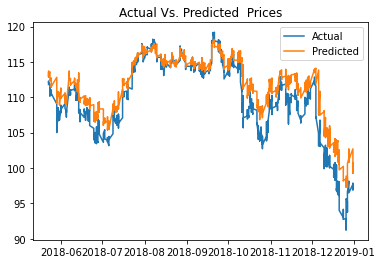

In [153]:
# Plot the real vs predicted prices as a line chart
stocks.plot(title="Actual Vs. Predicted  Prices")

In [154]:
price = pd.DataFrame(stocks)
price

,Actual,Predicted
2018-05-23,111.80,113.439331
2018-05-23,111.91,113.274773
2018-05-23,111.86,113.225128
2018-05-23,111.97,113.043190
2018-05-23,111.88,112.878334
...,...,...
2018-12-31,97.02,99.339035
2018-12-31,97.04,99.265877
2018-12-31,97.10,99.270607
2018-12-31,97.21,99.376999


In [155]:
fast_ema = 9
slow_ema = 21

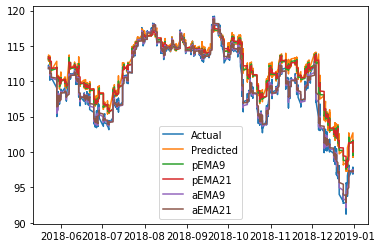

In [156]:
# create EMAs columns
price['pEMA9'] = price['Predicted'].ewm(span=fast_ema, adjust=False).mean()
price['pEMA21'] = price['Predicted'].ewm(span=slow_ema, adjust=False).mean()
price['aEMA9'] = price['Actual'].ewm(span=fast_ema, adjust=False).mean()
price['aEMA21'] = price['Actual'].ewm(span=slow_ema, adjust=False).mean()
# price['compEMAS'] = 0.0
price.plot()

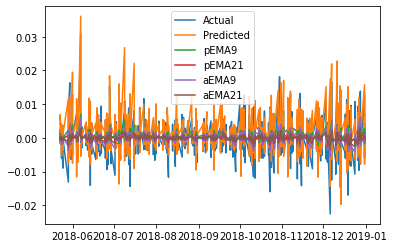

In [157]:
price.pct_change().plot()

In [158]:
# Initial imports
import numpy as np
import pandas as pd
from stockstats import StockDataFrame as sdf
import requests
from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
from pathlib import Path
import lib_copy
load_dotenv()
%matplotlib inline

ticker_symbol = ["TSLA"]

Python-dotenv could not parse statement starting at line 7
Python-dotenv could not parse statement starting at line 8


In [159]:
X = final_df.iloc[:, 0:20].values
y = final_df.iloc[:, -1].values

X, y = np.array(X), np.array(y).reshape(-1,1)

In [160]:
def lstm(
    dataframe,
    num_feature_cols = 2, 
    target_name = "target",
    epochs_num = 10,
    unit_number = 30,
    dropout_fraction=.2    
    ):

    """
    Make sure to have target in last column
    """

    X = dataframe.iloc[:, 0:num_feature_cols].values
    
    y = dataframe.iloc[:,-1].values
    
    X, y = np.array(X), np.array(y).reshape(-1,1)

    # Manually splitting the data
    split = int(0.7 * len(X))

    X_train = X[: split]
    X_test = X[split:]

    y_train = y[: split]
    y_test = y[split:]

    # Importing the MinMaxScaler from sklearn
    from sklearn.preprocessing import MinMaxScaler

    # Create a MinMaxScaler object
    scaler = MinMaxScaler()

    # Fit the MinMaxScaler object with the features data X
    scaler.fit(X)

    # Scale the features training and testing sets
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # Fit the MinMaxScaler object with the target data Y
    scaler.fit(y)

    # Scale the target training and testing sets
    y_train = scaler.transform(y_train)
    y_test = scaler.transform(y_test)

    # Importing required Keras modules
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout

    # Define the LSTM RNN model.
    model = Sequential()

    # Layer 1
    model.add(LSTM(
        units=unit_number,
        return_sequences=True,
        input_shape=(X_train.shape[1], 1))
        )
    model.add(Dropout(dropout_fraction))

    # Layer 2
    model.add(LSTM(units=number_units, return_sequences=True))
    model.add(Dropout(dropout_fraction))

    # Layer 3
    model.add(LSTM(units=number_units))
    model.add(Dropout(dropout_fraction))

    # Output layer
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer="adam", loss="mean_squared_error")

    # Train the model
    model.fit(X_train, y_train, epochs= epechs_num, shuffle=False, batch_size=90, verbose=1)

    # Make predictions using the testing data X_test
    predicted = model.predict(X_test)

    # Recover the original prices instead of the scaled version
    predicted_prices = scaler.inverse_transform(predicted)
    real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
    # Create a DataFrame of Real and Predicted values
    comparison = pd.DataFrame({
        "Actual Target": real_prices.ravel(),
        "Predicted Target": predicted_prices.ravel()
    }, index = dataframe.index[-len(real_prices): ]) 

    return model.summary(), model.evaluate(X_test, y_test, verbose=0), comparison.plot()

In [161]:
dataframe = lib_copy.fetch_ohlcv(ticker_symbol)
def adding_boll_kelt_ewma_dataframe(dataframe):
    lib_copy.bollinger_band_generator(dataframe)
    lib_copy.keltner_channel(dataframe)
    lib_copy.ewma(dataframe)

    return dataframe

everything = adding_boll_kelt_ewma_dataframe(dataframe)

everything = df.dropna()

response_data = lib_copy.signals_generator(everything)

response_data.index = response_data.index.date
final_df = response_data

KeyError: 'close'

In [162]:
lstm(final_df)

NameError: name 'epechs_num' is not defined